In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels
import scikit_posthocs as sp
import sys
import scipy
import matplotlib.colors as colors

In [23]:
glom_volume = pd.read_csv("../csvs/fly_glomeruli_volume.csv")
glom_volume_single_uPN = pd.read_csv("../csvs/fly_glomeruli_volume_feedforward_single_uPN.csv")

In [24]:
#label each glomerulus appropriately 
glom_volume['glom_pn_type'] = ['single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs',
                            'multiple uPNs', 'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs',
                            'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs',
                            'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs', 'single uPN','single uPN','single uPN']

glom_volume_single_uPN['glom_pn_type'] = ['single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','multiple uPNs', 'single uPN']   

In [25]:
#This CSV is created by retrieve_neuron_data.ipynb
cable_length_data = pd.read_csv('../csvs/cable_length_data.csv')

In [26]:
#converts wide table to long table format for plotting
cable_length_data_long = pd.melt(cable_length_data)
cable_length_data_long = cable_length_data_long[cable_length_data_long['value'].notna()]

In [27]:
#populates columns based on glomerulus type for plotting
hue_list_cable_length = [] 
for row in cable_length_data_long.iterrows():
    glom = row[1]['variable']
    hue_list_cable_length.append(glom_volume.loc[glom_volume['glomerulus'] == glom]['glom_pn_type'].values[0]) 

cable_length_data_long['glomerulus type'] = hue_list_cable_length
cable_length_data_long['color'] = cable_length_data_long['glomerulus type']

cable_length_data_long = cable_length_data_long[(cable_length_data_long['variable']!= 'Glomerulus 2')
                                                                                  & (cable_length_data_long['variable']!= 'Glomerulus 3')]

glom1_index = cable_length_data_long.loc[cable_length_data_long['variable'] == 'Glomerulus 1'].index
glomV_index = cable_length_data_long.loc[cable_length_data_long['variable'] == 'V'].index

for cell_index in glom1_index: 
    cable_length_data_long.at[cell_index,'color'] = 'Glomerulus 1'
for cell_index in glomV_index: 
    cable_length_data_long.at[cell_index,'color'] = 'V'    

In [28]:
#post hoc tests
uncorrected_cable_length_post_hoc_all = sp.posthoc_mannwhitney(cable_length_data_long,val_col='value',group_col='variable')

cable_length_correction_results_all = statsmodels.stats.multitest.multipletests(uncorrected_cable_length_post_hoc_all['Glomerulus 1'], alpha=0.05, method='bonferroni')
corrected_cable_length_post_hoc_all = pd.DataFrame({'Glomerulus': list(uncorrected_cable_length_post_hoc_all['Glomerulus 1'].index),
                                               'significant': cable_length_correction_results_all[0],
                                               'uncorrected_p_value': uncorrected_cable_length_post_hoc_all['Glomerulus 1'],
                                               'corrected p_value':cable_length_correction_results_all[1]})
corrected_cable_length_post_hoc_all

,Glomerulus,significant,uncorrected_p_value,corrected p_value
D,D,True,3.588131e-05,0.001866
DA1,DA1,True,4.990016e-07,0.000026
DA2,DA2,True,3.588131e-05,0.001866
DA3,DA3,True,6.331032e-05,0.003292
DA4l,DA4l,True,2.208318e-05,0.001148
DA4m,DA4m,True,1.451271e-05,0.000755
DC1,DC1,True,1.200944e-05,0.000624
DC2,DC2,True,4.570593e-05,0.002377
DC3,DC3,True,6.331032e-05,0.003292
DC4,DC4,True,1.241545e-04,0.006456


In [29]:
cable_length_data_long_only_glom_1_medians = cable_length_data_long.groupby(by=["variable"])["value"].median()
cable_length_data_long_only_glom_1_medians = abs(cable_length_data_long_only_glom_1_medians - cable_length_data_long_only_glom_1_medians['Glomerulus 1'])
cable_length_data_medians = pd.DataFrame(cable_length_data_long_only_glom_1_medians)
cable_length_data_medians['Glomerulus'] = cable_length_data_medians.index
cable_length_data_medians['p_value']= corrected_cable_length_post_hoc_all['corrected p_value']
cable_length_data_medians

,value,Glomerulus,p_value
variable,,,
D,311.256341,D,0.001866
DA1,376.749284,DA1,0.000026
DA2,399.021915,DA2,0.001866
DA3,424.859619,DA3,0.003292
DA4l,424.647768,DA4l,0.001148
DA4m,416.603572,DA4m,0.000755
DC1,351.649291,DC1,0.000624
DC2,350.942456,DC2,0.002377
DC3,316.969252,DC3,0.003292


findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

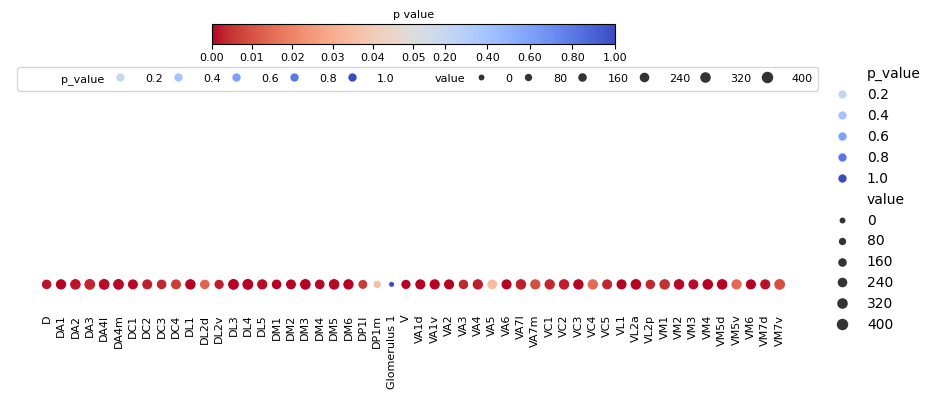

In [30]:
divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=.05, vmax=1)
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("coolwarm", as_cmap=True).reversed(),norm=divnorm)

ax = sns.relplot(data = cable_length_data_medians, y = [0.75] * 52, x='Glomerulus',size='value',
            #sizes=relplot_sizing(in_volume_cable_length_medians['value'],10,25),
            #size_order = list(range(len(in_volume_cable_length_medians['sizing']))),
            palette=sns.color_palette("coolwarm", as_cmap=True).reversed() ,hue='p_value',hue_norm=divnorm,height=4, aspect=18/8)
plt.ylim(0.75,1.25)
plt.xticks(rotation=90)
plt.xticks(fontsize=8, fontname="Liberation Sans")
plt.tick_params(left=False,bottom=False)
ax.set_yticklabels([])
ax.set_xlabels("")
legend = plt.legend(loc="upper left", ncol=13, columnspacing=0.10,frameon=None)
for text in legend.texts: 
    text.set_fontsize(8)

cbar = ax.figure.colorbar(sm,ax=plt.gca(),ticks = [0, 0.01,0.02,0.03,0.04,0.05, 0.2, 0.4, 0.6, 0.8, 1],
                          fraction=.2,shrink=0.5,orientation='horizontal',
                          location='top')#,norm=colors.TwoSlopeNorm(vmin=min(in_volume_cable_length_medians['p_value']), vcenter=.05, vmax=max(in_volume_cable_length_medians['p_value'])))#,values=divnorm(in_volume_cable_length_medians['p_value']))
cbar.ax.tick_params(labelsize=8) 
cbar.ax.xaxis.set_ticks_position("bottom")
cbar.set_label('p value', size=8)
#cbar.ax.set_yscale('linear')

sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)

plt.savefig('../svgs/cable_length_only_glom_1_relplot.svg', format="svg")
plt.show()